## Import what we need

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading data from mnist dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

## Checking shapes and dtypes

In [3]:
print("Train Data Check")
print(type(train_data))
print(train_data.dtype)
print(train_data.shape)

print("Train Labels Check")
print(type(train_labels))
print(train_labels.dtype)
print(train_labels.shape)

print("Test Data Check")
print(type(test_data))
print(test_data.dtype)
print(test_data.shape)

print("Test Labels Check")
print(type(test_labels))
print(test_labels.dtype)
print(test_labels.shape)

Train Data Check
<class 'numpy.ndarray'>
uint8
(60000, 28, 28)
Train Labels Check
<class 'numpy.ndarray'>
uint8
(60000,)
Test Data Check
<class 'numpy.ndarray'>
uint8
(10000, 28, 28)
Test Labels Check
<class 'numpy.ndarray'>
uint8
(10000,)


## Flattening Data(Images) by reshaping to (-1, 784)

In [4]:
train_data = np.reshape(train_data, (-1, 28 * 28))
test_data = np.reshape(test_data, (-1, 28 * 28))
train_data.shape, test_data.shape

((60000, 784), (10000, 784))

## Converting labels to One-Hot encoding

In [6]:
from tensorflow.keras.utils import to_categorical

ERROR! Session/line number was not unique in database. History logging moved to new session 100


In [7]:
train_labels = to_categorical(train_labels, num_classes=10)
train_labels.shape

(60000, 10)

In [8]:
test_labels = to_categorical(test_labels, num_classes=10)
test_labels.shape

(10000, 10)

In [9]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Normalize data

In [11]:
train_data.min(), train_data.max()

(0, 255)

In [12]:
train_data = train_data.astype('float32')
train_data = train_data / 255

In [13]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [14]:
test_data.min(), test_data.max()

(0, 255)

In [15]:
test_data = test_data.astype('float32')
test_data = test_data / 255 

In [16]:
test_data.min(), test_data.max()

(0.0, 1.0)

## Final Check

In [17]:
# print(train_data.dtype)
# print(train_data.shape)
# print(train_data[0])

# print(train_labels.dtype)
# print(train_labels.shape)
# print(train_labels[0])

# print(test_data.dtype)
# print(test_data.shape)
# print(test_data[0])

# print(test_labels.dtype)
# print(test_labels.shape)
# print(test_labels[0])

## Use some portion of data

In [18]:
train_data = train_data[:30000]
train_labels = train_labels[:30000]

In [19]:
train_data.shape

(30000, 784)

In [20]:
train_labels.shape

(30000, 10)

## Creating Classification Model

In [21]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

In [22]:
input_layer = Input(shape=(784,))
h1 = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_layer)
d1 = Dropout(0.25)(h1)
h2 = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(d1)
d2 = Dropout(0.25)(h2)
h3 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(d2)
output_layer = Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))(h3)
mnist_model = Model(input_layer, output_layer)
mnist_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290  

## Compile the model
### Early Stopping method to avoid overfitting

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='accuracy', patience=10, mode='max', restore_best_weights=True)

### Specify optimizer and loss function

In [25]:
mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [28]:
mnist_model.fit(x=train_data, y=train_labels, batch_size=32, epochs=40, callbacks=[early_stop], validation_split=0.25)

Train on 22500 samples, validate on 7500 samples
Epoch 1/40
22500/22500 [==============================] - 15s 680us/sample - loss: 0.9570 - accuracy: 0.8849 - val_loss: 0.6522 - val_accuracy: 0.9251
Epoch 2/40
22500/22500 [==============================] - 13s 562us/sample - loss: 0.5461 - accuracy: 0.9410 - val_loss: 0.4919 - val_accuracy: 0.9405
Epoch 3/40
22500/22500 [==============================] - 12s 547us/sample - loss: 0.4503 - accuracy: 0.9468 - val_loss: 0.4282 - val_accuracy: 0.9487
Epoch 4/40
22500/22500 [==============================] - 14s 641us/sample - loss: 0.4093 - accuracy: 0.9509 - val_loss: 0.3940 - val_accuracy: 0.9536
Epoch 5/40
22500/22500 [==============================] - 12s 513us/sample - loss: 0.3841 - accuracy: 0.9546 - val_loss: 0.4015 - val_accuracy: 0.9465
Epoch 6/40
22500/22500 [==============================] - 13s 597us/sample - loss: 0.3701 - accuracy: 0.9568 - val_loss: 0.3755 - val_accuracy: 0.9520
Epoch 7/40
22500/22500 [=====================

<AxesSubplot:>

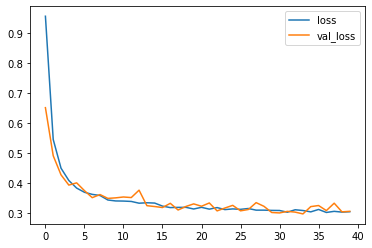

In [29]:
pd.DataFrame({'loss':mnist_model.history.history['loss'],
             'val_loss':mnist_model.history.history['val_loss']}).plot()

<AxesSubplot:>

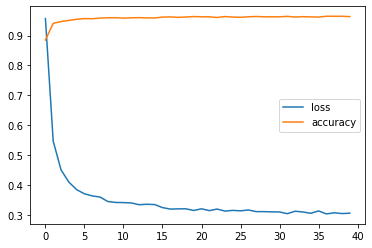

In [30]:
pd.DataFrame({'loss':mnist_model.history.history['loss'],
             'accuracy':mnist_model.history.history['accuracy']}).plot()

In [31]:
np.min(mnist_model.history.history['loss'])

0.30276324370172286

In [32]:
np.max(mnist_model.history.history['accuracy'])

0.9647111

## Testing Model with test data

In [ ]:
#compile, fit, evaluate, predict

In [33]:
mnist_model.evaluate(test_data, test_labels, batch_size=32)

10000/10000 [==============================] - 2s 191us/sample - loss: 0.3027 - accuracy: 0.9648


[0.3026947006702423, 0.9648]

In [35]:
prediction = mnist_model.predict(test_data)

In [36]:
np.argmax(prediction[0]), test_labels[0]

(7, array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))